[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/2023/Week%206.ipynb)

###### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2023

## Week 6 - Support Vector Machines, Parameter effects, Bias and Variance

New model, more parameters! Make sure you know them well!

---
## Theoretical Questions

### Question 1: Linear Separability

#### 1.1: If a dataset isn’t linearly separable, an SVM learner has two major options. What are they, and why might we prefer one to the other?

- Soft margin: Allow few points to be on the wrong side with a penalty
  - Preferred if only a few variables are slacking off
- Kernel methods: Map data to another dimension where it is more linear separable
  - Preferred when the data doesn't look linear at all

#### 1.2: Contrary to many geometric methods, SVMs work better with large attribute sets. Why might this be true?
- In a dataset there will always be few features that do all the job and few that barely do anything at all *(I hope your uni group work is not like this)*
- SVM capture the relationships between features without the need of feature engineering *(i.e. assigning weights representing feature importance) (that's like your team review system. The freeloader gets the 0)*

The SVM will only require a subset of training data to make the support vectors ▶ Train and Prediction more efficient and scalable to number of input features

### 2: Evaluate SVM Statements

#### 2.1 What is the significance of the Lagrange multipliers of non-support vectors in SVMs?

Remember, Larange multipliers is used during optimization - find the margin that gives the lowest error. Only support vectors are added, which means Larange multipliers of non support vectors are 0.

#### 2.2 How do changes in data points affect the decision boundary of an SVM?
- Non support vectors: No change, because they don't contribute anything
- Support vectors: will shift/rotate your boundary line as it directly defines the line.

#### 2.3 How many binary classifiers are needed to classify a dataset with 4 classes using the one-vs-one method in SVMs?
1v1 will need a binary classifier for each unique pair. For N classes there are $\frac{N(N-1)}{2}$ such pairs (do your maths!) ▶ You should get 6 pairs for 4 classes.

#### 2.4 Is Soft-margin SVM is equivalent to Hard-margin SVM if the slack penalty C is set to 0?
No. You just get a crap model that overfits.

It is equivalent to hard-margin SVM if C is super high ($\infty$) that you cannot let any errors getting in.

#### 2.5 What is the value of slack variables for data points that are correctly classified in SVMs?
0 all the way. It is only non-zero if it lies on the other side of the boundary.

### 3: You are developing a model to detect an extremely contagious disease. Your data consists of 4000 patients, out of which 100 are diagnosed with this illness. You achieve 96% classification accuracy.

#### 3.1 Can you trust the outcome of your model? Explain why.
No. There is heavy class imbalance here (even 0R can have a decent training accuracy)

#### 3.2 What type of error is most important in this task?
False Negative (FN)/Type II error - fatal as a miss out can cause big consequences.

Better safe than sorry - it is better to minimize FN, even if it means increasing the False Positive (FP)

#### 3.3 Name at least one appropriate evaluation metric that you would choose to evaluate your model.
Recall (sensitivity): it directly measures the ability of the model to detect cases of the disease and minimize false negatives. A high recall indicates that the model is effective in detecting positive cases, while a low recall indicates that the model is missing positive cases and may need further refinement.

### 4: How does the choice of hyperparameter for the stopping criterion affect the performance of decision trees?

Hint: Look at `sklearn` documentation about `DecisionTreeClassifier`

Stopping criterion: when the algorithm should stop splitting
- Minimum number of samples for splitting
- Maximum tree depth
- Minimum number of samples per node

- Eased criterion will make model more complex -> More likely overfitting if data noisy
- Strict criterion (earlier stopping) will make model more simple -> Better generalisation but may underfit.

### 5: How does the k value in k-NN algorithm affect the decision boundary between classes?
- Low K: More likely to overfit (increase variance)
- High K: Smoother, may underfit (increase bias)

P/S: Make sure you can explain why to this as well! Just above is not enough in an exam question!

---
## Coding exercises

Today, we will be examining the behaviour of some **Support Vector Machine classifiers.**

To do so, we are using the `IRIS` dataset again.


In [ ]:
import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt

iris = datasets.load_iris()

### Exercise 1. 
By only considering the first 2 features of this dataset (`'Sepal length'` and `'Sepal width'`) create a 2D projection of the iris dataset.

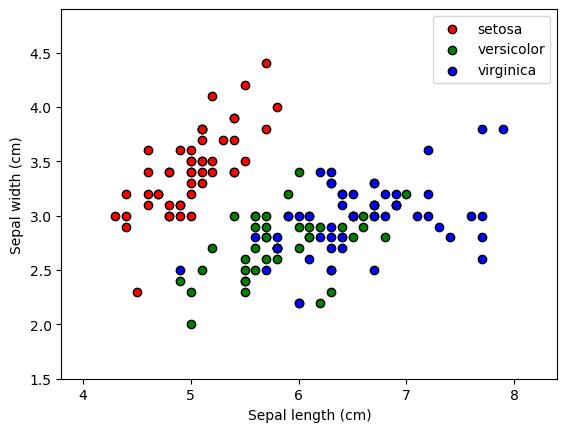

In [ ]:
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 # adds a margin of 0.5 units to the left and right of the x-axis range
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 # adds a margin of 0.5 units to the left and right of the y-axis range

X_0, X_1, X_2 = X[y==0], X[y==1], X[y==2] 
plt.scatter(X_0[:,0], X_0[:,1], c='r', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[0])
plt.scatter(X_1[:,0], X_1[:,1], c='g', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[1])
plt.scatter(X_2[:,0], X_2[:,1], c='b', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[2])

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

As covered in the lectures, The main goal of SVM is to find the hyperplane that best separates the data points of different classes. 

There are different types of SVM classifiers, such as linear SVM, polynomial SVM, and radial basis function (RBF) SVM. The linear SVM classifier works by finding the optimal hyperplane that separates the two classes using a linear equation. The polynomial SVM classifier uses a polynomial kernel function to transform the data into a higher-dimensional space, where the optimal hyperplane can be found using a linear equation. The RBF SVM classifier uses a Gaussian function to transform the data into an infinite-dimensional space, where the optimal hyperplane can be found using a non-linear equation.

The following code shows how to plot the decision surface for four SVM classifiers with different kernels:

``` python
    LinearSVC()          # Linear SVM
    SVC(kernel='linear')       # SVM with linear Kernel
    SVC(kernel='rbf', gamma = 0.7, C=1)    # SVM with Radial Basis Function (RBF) kernel
    SVC(kernel='poly', degree = 3, C=1)     # SVM with Polynomial Kernel
```

You can always find more details on how to use them on the `sklearn` documentation!

<details>
  <summary>More details</summary>

`LinearSVC()` is a linear SVM classifier, which uses a linear kernel to find the optimal hyperplane that separates the data points. This classifier is designed for large-scale datasets with a high number of features, as it uses an optimization algorithm called stochastic gradient descent (SGD) to find the optimal hyperplane.

`SVC(kernel='linear')` is also an SVM classifier provided by Scikit-learn, but it uses the same linear kernel to find the optimal hyperplane. However, it uses a different optimization algorithm called the Sequential Minimal Optimization (SMO) algorithm, which is better suited for smaller datasets. SGD is faster and better suited for large datasets, while SMO is better for smaller datasets.

`SVC(kernel='rbf')` The RBF kernel is a popular choice for SVMs as it can handle non-linearly separable data by mapping the data to a higher-dimensional space. </br>
The `gamma` parameter is a hyperparameter in SVM, it determines how far the influence of a single training example reaches, with low values meaning far and high values meaning close. A low gamma value means that the decision boundary is smoother and more generalized, which may lead to underfitting. On the other hand, a high gamma value means that the decision boundary is more tightly fitted to the training data, which may lead to overfitting. *(Note: Explaining the insight behind the kernels' hyper-parameters (e.g. $\gamma$ (gamma) as 'smoothing factor') is out of scope of this subject.)*

`SVC(kernel='poly')` The polynomial kernel is a popular choice for SVM classification problems, as it allows the SVM to model non-linear decision boundaries.
The `degree` parameter specifies the degree of the polynomial kernel function. A higher degree leads to a more complex decision boundary, but also increases the risk of overfitting. 

The `C` parameter is the penalty parameter, which controls the trade-off between maximizing the margin and minimizing the classification error. A smaller `C` value will result in a wider margin but more misclassified examples, while a larger `C` value will result in a narrower margin but fewer misclassified examples. 
</details>

#### Exercise 1. (a)
Examine the visualisations of the four different SVMs, paying close attention to the decision boundaries. Which do you think has the best expressitivity, based on the two–dimensional slice shown?

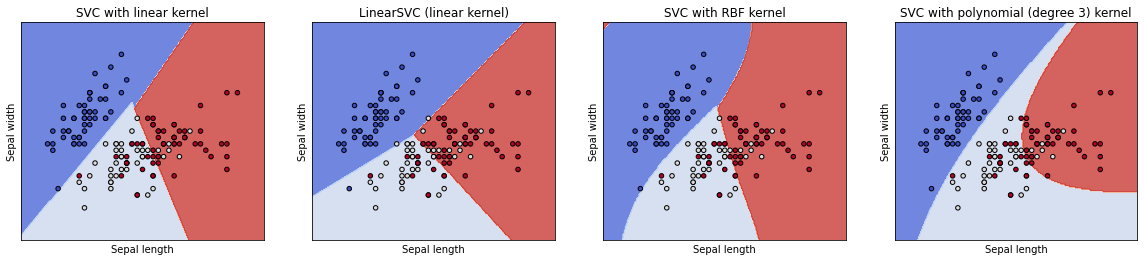

In [ ]:
# Derived from the scikit-learn documentation example from:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))

models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 4, figsize=(20,4))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Factos: [`LinearSVC` vs. `SVC('linear')`](https://stackoverflow.com/questions/35076586/when-should-one-use-linearsvc-or-svc) They are not the same!

*Well, this is largely a matter of perspective. However, based solely on the information given, the straight-line boundaries of the linear-kernel SVMs appear to be slightly too simple for this dataset.*


#### Exercise 1. (b)
Lets use another pair of attributes from the Iris dataset (`'petal length'` and `'petal width'`) to create a differnt 2D projection of the iris dataset. 

```python
# petal length and petal width are the final two attributes.
X = iris.data[:, 2:]
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Plot the training points
plt.scatter(..., ..., c=..., cmap=plt.cm.Set1, edgecolor='k')
```


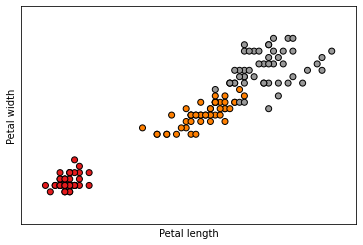

In [ ]:
# petal length and petal width are the final two attributes.
X = iris.data[:, 2:]
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

   Examine the visualisation of the four SVM models on this new mapping. What is your conclusion comparing results from part (a) and part (b) graphs?

```python
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(15,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = ..., ...
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(..., ..., c=..., cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(...)
    ax.set_ylabel(...)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show();
```

(-0.4, 3.0)

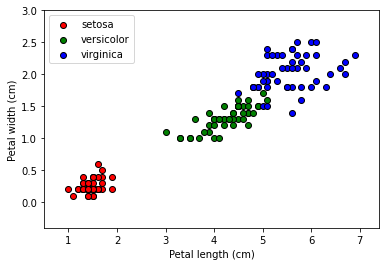

In [ ]:
X_0, X_1, X_2 = X[y==0], X[y==1], X[y==2]
plt.scatter(X_0[:,0], X_0[:,1], c='r', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[0])
plt.scatter(X_1[:,0], X_1[:,1], c='g', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[1])
plt.scatter(X_2[:,0], X_2[:,1], c='b', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[2])

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

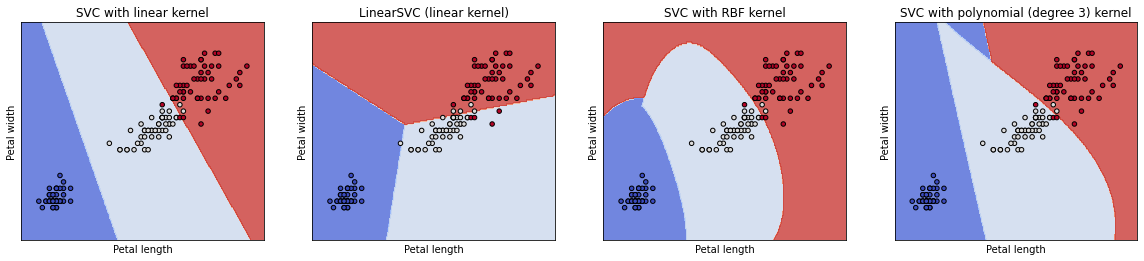

In [ ]:
# Derived from the scikit-learn documentation example from:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))

models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')


# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 4, figsize=(20,4))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show();

##### *Answer*

*It can be observed from the results that features `'petal length'` and `'petal width'` are better (make less mistakes) for building the SVM model. In another word, these two features contain more information about our classes (more correlated with the class labels) in compare with the earlier pair of features we used (`'Sepal length'` and `'Sepal width'`).*

#### Exercise 1. (c)
The default value of the $C$ parameter (the “penalty” for mis-classified examples OR the 'regularisation factor') is 1. Increase (or decrease) this value and observe how the decision boundaries change.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


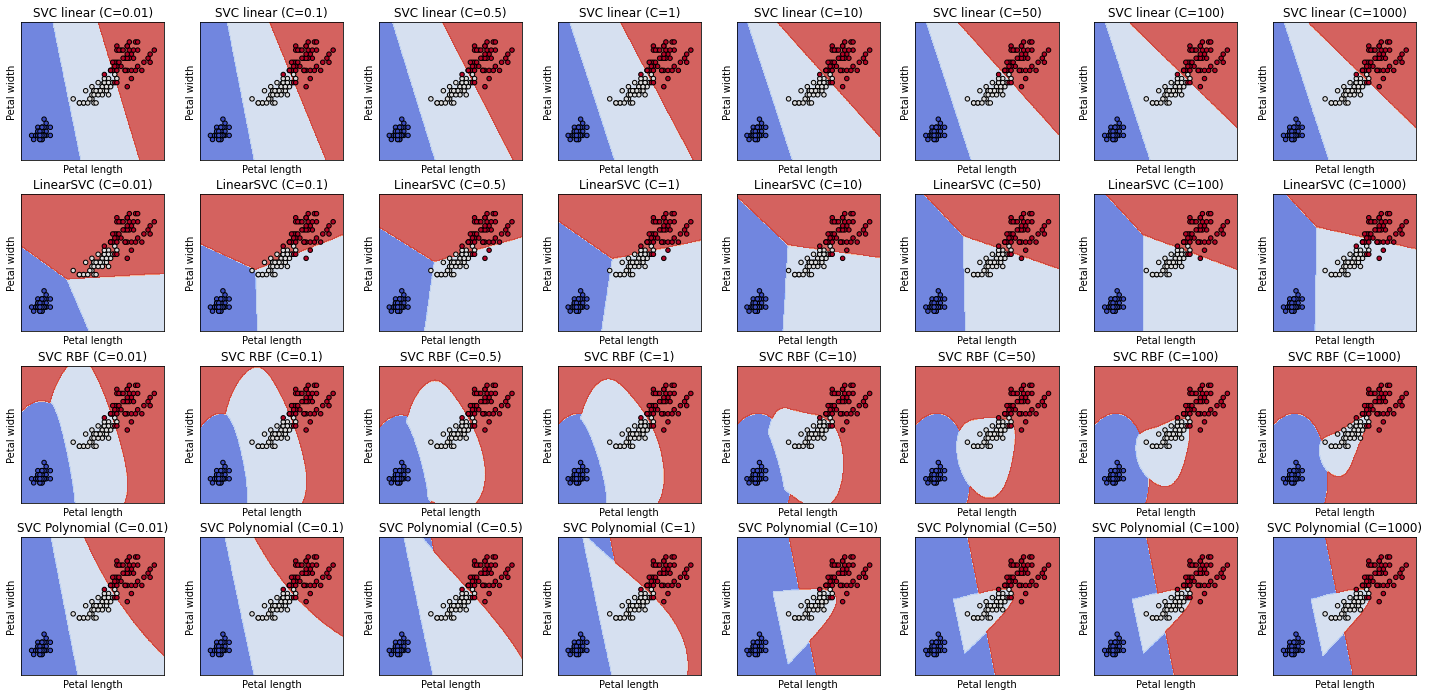

In [ ]:
Cs = [0.01,0.1,0.5,1,10,50,100,1000]
# Set-up grid for plotting.
fig, sub = plt.subplots(4,len(Cs), figsize=(25,12))
plt.subplots_adjust(wspace=0.25, hspace=0.25)

for i,C in enumerate(Cs):
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=10000),
              svm.SVC(kernel='rbf', gamma=0.7, C=C),
              svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))

    models = (clf.fit(X, y) for clf in models)

    # title for the plots
    titles = (f'SVC linear (C={C})',
              f'LinearSVC (C={C})',
              f'SVC RBF (C={C})',
              f'SVC Polynomial (C={C})')
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub[:,i].flatten()):
        plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Petal length')
        ax.set_ylabel('Petal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

plt.show();

##### *Answer*

```
tl;dr: High C = Overfit (Hard margin), Low C = Underfit
```

*Higher C means a higher penalty for misclassification (harder margins), so we'll have narrower margines and more complex/expressive decision boundaries that might work very well for the training data, but might not work well (generalise) for the test data, which can leads to overfitting.*

*We can observe this by calculating accuracy on using holdout or cross-validation.*

##### *optional complementory answer* 
Here $C$ controls the tradeoff between margin maximization and correct classification. Recall the primal, constrained problem:

$$
\min_{\mathbf{w},\xi} \frac{1}{2} \Vert \mathbf{w} \Vert^2 + C \sum_{i=1}^N \xi_i^p \quad \text{subject to} \; y_i (\langle w, \mathbf{x}_i \rangle + b) \geq 1 - \xi_i, \; \xi_i \geq 0
$$

What are the $\xi_i$? We've relaxed the problem from perfect hyperplane separation, $y_i (\langle \mathbf{x}_i,\mathbf{w}\rangle) \geq 1$, to permitting a violation of the margin by the slack variable $\xi_i \geq 0$.

Introduce Lagrange multipliers $\lambda_i$, $\alpha_i$ for each respective inequality constraint ($N$ of them) to pass from constrained to unconstrained form:

$$
\mathcal{L}(\mathbf{w}) = \frac{1}{2} \Vert \mathbf{w} \Vert^2 + C \sum_{i=1}^N \xi_i^p - \sum_{i=1}^N \lambda_i \left(y_i (\langle w, \mathbf{x}_i \rangle + b - 1+ \xi_i )\right) - \sum_i \alpha_i \xi_i 
$$

Obtain KKT conditions by optimality conditions of the Lagrangian $\mathcal{L}$. The most important KKT condition is from the first optimality condition, $\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = 0$, this tells us $\mathbf{w} = \sum_i \lambda_i y_i \mathbf{x}_i$. i.e. the hyperplane is defined by a linear combination of the training vectors. A secondary optimality condition tells us that $\lambda_i = 0$ except for the support vectors, so we have a sparse representation of the hyperplane.

substitute these conditions into the primal form to obtain the dual form. This is typically what software packages optimize over.

$$
\mathcal{L} = \sum_{i=1}^N\lambda_i - \frac{1}{2} \sum_{i,j}^N \lambda_i \lambda_j y_i y_j \color{red}{\langle \mathbf{x}_i, \mathbf{x}_j \rangle}
$$

Why? Note no inner product $\langle \mathbf{w}, \mathbf{x} \rangle$! Now only a sum over $<N$ datapoints, compared to evaluation of $D$ products, and $N \ll D$ almost always for kernelized representations. How to kernelize?

$$
\mathcal{L} = \sum_{i=1}^N\lambda_i - \frac{1}{2} \sum_{i,j}^N \lambda_i \lambda_j y_i y_j \color{red}{\mathcal{K}(\mathbf{x}_i, \mathbf{x}_j)}
$$

Where $\mathcal{K}(x_i,x_j) = \langle \phi(x_i), \phi(x_j)\rangle$ implicitly defines a high (potentially infinite) dimensional inner product. This permits our decision boundary to be a nonlinear function in the feature vectors. 

#### Exercise 1. (d)
Calculate the training accuracy of the various SVM classifiers that you graphed in part (b). Do you see any evidence that any of these classifiers might be overfitting this data?

In [ ]:
#these models are already fitted to the whole iris dataset
#Note that they are trained only on 2 out of four features.

models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))

models = (clf.fit(X, y) for clf in models)

titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

for title, model in zip(titles, models):
    acc = model.score(X, y)
    print(title, acc)

SVC with linear kernel 0.82
LinearSVC (linear kernel) 0.8
SVC with RBF kernel 0.8266666666666667
SVC with polynomial (degree 3) kernel 0.8133333333333334


The accuracy on the training data does look suspiciously high - especially in light of the different decision boundaries - but we need more information to be sure.

### Exercise 2.
Let’s summarise some earlier work. Use all four attributes from the Iris data, and compare the training accuracy with the accuracy estimated by 10–fold (stratified) cross–validation, for the following models:

    (a) One-R
    (b) 1-Nearest Neighbour ( neighbors.KNeighborsClassifier )
    (c) 5-Nearest Neighbour
    (d) Decision Trees
    (e) LinearSVC()
    (f) SVMs with a cubic (polynomial degree 3) kernel 
    (g) SVMs with an RBF kernel

In [ ]:
import warnings

# ignore future warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Ok ok I know SVM isn't converging already, just shut up 
import warnings
warnings.filterwarnings('ignore', message='Liblinear failed to converge')

#print(cross_val_score(zero_r, X, y, cv=10))
X = iris.data
y = iris.target

#try to change C to 1000 or 0.001
C = 1.0  # SVM regularization parameter
models = [DecisionTreeClassifier(max_depth=1),
          KNeighborsClassifier(n_neighbors=1),
          KNeighborsClassifier(n_neighbors=5),
          DecisionTreeClassifier(max_depth=None),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C)]

titles = ['1-R',
          '1-Nearest Neighbour',
          '5-Nearest Neighbour',
          'Decision Tree',
          'LinearSVC',
          'SVM (cubic kernel)',
          'SVM (RBF kernel)']

title_training_acc = {}
for title, model in zip(titles, models):
    model.fit(X, y)
    title_training_acc[title] = model.score(X, y)

title_crossvalidation_acc = {}
for title, model in zip(titles, models):
    title_crossvalidation_acc[title] = np.mean(cross_val_score(model, X, y, cv=10))

for title in titles:
    print(f'{title}:\n -Training Acc: {title_training_acc[title]*100:.2f}%\n -X-Val Acc: {title_crossvalidation_acc[title]*100:.2f}%')
    

1-R:
 -Training Acc: 66.67%
 -X-Val Acc: 66.67%
1-Nearest Neighbour:
 -Training Acc: 100.00%
 -X-Val Acc: 96.00%
5-Nearest Neighbour:
 -Training Acc: 96.67%
 -X-Val Acc: 96.67%
Decision Tree:
 -Training Acc: 100.00%
 -X-Val Acc: 96.00%
LinearSVC:
 -Training Acc: 96.67%
 -X-Val Acc: 96.67%
SVM (cubic kernel):
 -Training Acc: 98.00%
 -X-Val Acc: 97.33%
SVM (RBF kernel):
 -Training Acc: 97.33%
 -X-Val Acc: 96.67%


```tl;dr: Today's Iris dataset is simple, so models can get correct predictions easily. Wait until you get to the real Kaggle-style datasets``` 💀 💀 💀

*Aside from 1-R (our baseline), all of these learners can build a model that predicts the data fairly well, even when it is unseen (in cross-validation). The only learners that are probably overfitting are 1-NN and the Decision Tree; this is a fairly common phenomenon, as they agressively attempt to reproduce the training data exactly. Generally though, Iris is a fairly easy problem for most of the ML models; probably because the attribute (especially related to the petals) suggest the class very strongly. As the semester continues, we'll examine some more non-trivial problems.*